# WPROWADZENIE

**Źródło danych:** 
https://www.kaggle.com/maricinnamon/harry-potter-movies-dataset-starter-notebook/data

**Wykorzystane pliki z setu:** 
* Characters.csv
Jest to zbiór wszystkich postaci występujących w serii filmów o Harrym Poterze.

**Tezy do sprawdzenia:**
1. Ile postaci posiada to samo nazwisko? 
    * Jaki procent wszystkich postaci stanowi 5 najczęściej występujących nazwisk?
    * Ile nazwisk występuje tylko raz?
    * Czy to, że nie ma więcej osób o tym nazwisku oznacza, że były to drugoplanowe role? (potrzebny zbiór Dialogue.csv)
2. Czy w serii o HP występuje parytet? 
    * Ile procent postaci to kobiety?
    * Ile procent postaci to mężczyźni?
3. Ile procent postaci należy do:
    * Grifindor'u
    * Slytherin'u
    * Ravenclaw'u
    * Hufflepuff'u
4. Ile jest postaci o gatunku inny niż człowiek w serii o HP?
    * jaki procent innych gatunków stanowią poszczególne inne gatunki?
    * ile jest duchów?
    * czy każdy dom ma swojego ducha?
5. Ile postaci ma swojego patronusa?
    * czy któryś patronus się powtarza?


## PRZYGOTOWANIE IMPORTÓW I SPRAWDZENIE DANYCH:

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

characters = pd.read_csv('Harry_Potter_Movies\Characters.csv')

In [4]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null     object
 6   Wand (Wood)     21 non-null     object
 7   Wand (Core)     18 non-null     object
dtypes: int64(1), object(7)
memory usage: 10.5+ KB


In [5]:
characters.sample(7)

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
132,133,Station guard,NaN,NaN,NaN,NaN,NaN,NaN
10,11,Remus Lupin,Werewolf,Male,Gryffindor,Wolf,Cypress,Unicorn Hair
35,36,Cedric Diggory,Human,Male,Hufflepuff,NaN,NaN,NaN
57,58,Stanley Shunpike,Human,Male,NaN,NaN,NaN,NaN
21,22,Bellatrix Lestrange,Human,Female,Slytherin,NaN,Walnut,Dragon Heartstring
44,45,Lily Potter,Human,Female,Gryffindor,Doe,Willow,NaN
93,94,Katie Bell,Human,Female,Gryffindor,NaN,NaN,NaN


In [6]:
characters.isnull().sum()

Character ID        0
Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

## WNIOSKI PO WSTĘPNYM SPRAWDZENIU DANYCH:

* Zbiór posiada 166 postaci o unikalnym ID postaci
* Najwięcej informacji brakuje o rożdzkach i patronusach

# ANALIZA

## Ile postaci posiada to samo nazwisko? 

Aby sprawdzić to założenie należy kolumnę "Charakter Name" rozdzielić na dwie kolumny: "Name" i "Surname". Separatorem w tym wypadku będzie spacja.

In [76]:
only_charakter_name = {'Name_and_Surname': characters['Character Name']};
temp_list = pd.DataFrame(only_charakter_name)
split_list = pd.DataFrame(temp_list['Name_and_Surname'].str.split(" ", expand=True))
split_list.rename(columns={0: 'name', 1: 'surname'}, inplace=True)

Utworzę tabelę z samymi nazwiskami na której sprawdzę:
* top 5 najczęściej występujących nazwisk i  jaki to procent wszystkich nazwisk
* ile nazwisk występuje tylko raz

In [88]:
surname = pd.DataFrame(split_list['surname'].value_counts())
surname.head(5)

,surname
Weasley,8
Dursley,4
Potter,4
Granger,3
Malfoy,3


## Czy w serii o HP występuje parytet?

Na początek sprawdzam jakie i w jakiej ilości występują wartości w kolumnie 'Gender' czyli płeć.

In [8]:
characters['Gender'].value_counts()

Male      82
Female    42
Human      1
Name: Gender, dtype: int64

Pojawia się niespodzianka w postaci płci "Human". Występuje tylko jeden raz więc może to być błąd. Sprawdzam to szukając w kolumnie 'Gender' łańcucha znaków 'Human'.

In [9]:
characters[characters['Gender'].isin(['Human'])]

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
46,47,Nearly Headless Nick,Ghost,Human,Gryffindor,NaN,NaN,NaN


Pojawia się na 46 pozycji Prawiebezgłowy Nick, który jest duchem Gryffindoru. Ewidentnie wkradł się błąd, ponieważ ta postać powinna zostać sklasyfikowana jako mężczyzna. 
Naprawię to jedną linijką kodu.

In [10]:
characters['Gender'].replace('Human', 'Male', inplace=True)
characters.iloc[46:47,:]

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
46,47,Nearly Headless Nick,Ghost,Male,Gryffindor,NaN,NaN,NaN


In [11]:
characters['Gender'].value_counts()

Male      83
Female    42
Name: Gender, dtype: int64

Po zmianie widać, że w tabeli są tylko dwa rodzaje płci Kobieta (Female) i Mężczyzna (Male). Na pierwszy rzut oka widać, że kobiet jest dwa razy mniej niż mężczyzn. Co potwierdza poniższy wykres.

Text(0.5, 1.0, 'Płeć postaci w serii Harry Potter')

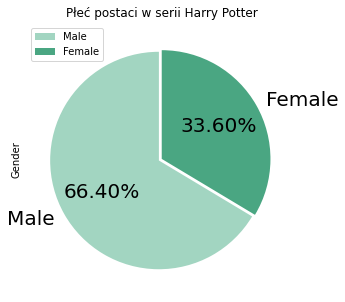

In [12]:
gender = characters['Gender'].value_counts();

plot = gender.plot.pie(
    figsize=(5,5), 
    legend=True, 
    fontsize=20,
    colors=['#a2d5c1', '#4aa682'],
    autopct = '%1.2f%%',
    explode=(0.030,0),
    startangle = 90,
    );
plt.title('Płeć postaci w serii Harry Potter')

## Ile procent postaci należy do konkretnego Domu?

## Ile jest postaci o gatunku inny niż człowiek w serii o HP?